# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
### Observation
# 1.Temperature is inversely related to latitude. As latitude increases, the temperature falls, and vice versa. Generally, 
#around the world, it gets warmer towards the equator and cooler towards the poles.

#2.With the sample data we don't observe no direct impact on humidity with latitude. 

#3.In regions near equator are having lower wind than mid and high latitude area. 


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
#print(weather_api_key)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

605

### Perform API Calls and Convert Raw Data to DataFrame
*Perform a weather check on each city using a series of successive API calls.
*Include a print log of each city as it'sbeing processed (with the city number and city name).
*Export the city data into a .csv.
*Display the DataFrame

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
# set up list to hold two different temperatures


# loop throught the list of units and append them to temperatures list


City = []
Lat = []
Lng = []
MaxTemp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
CountryDate = []


for city in cities:
    
    response = requests.get(query_url + city)
    response_json = response.json()
    #pprint(response_json)
    #City.append(response['coord']['lat'])
    #response_json["name"]
    try:
        MaxTemp.append(response_json["main"]["temp_max"])
        Lat.append(response_json['coord']['lat'])
        Lng.append(response_json['coord']['lon'])
        Humidity.append(response_json['main']['humidity'])
        Cloudiness.append(response_json['clouds']['all'])
        Wind_Speed.append(response_json['wind']['speed'])
        CountryDate.append((response_json['dt']))
        City.append(city)
        print(f"{city} found!")
    except:
        # Append null values
        print("City not found")
        pass


#print(f"The city information received is: {MaxTemp}")
#print(f"The temperature information received is: {City}")

new norfolk found!
cidreira found!
bengkulu found!
ayan found!
hermanus found!
yellowknife found!
kapaa found!
vaini found!
tasiilaq found!
City not found
hualmay found!
albany found!
puerto ayora found!
City not found
svetlogorsk found!
busselton found!
slivilesti found!
inhambane found!
shitanjing found!
tuktoyaktuk found!
punta arenas found!
smidovich found!
yaan found!
nanortalik found!
sarangani found!
hobart found!
severo-yeniseyskiy found!
rikitea found!
limenaria found!
hithadhoo found!
talnakh found!
grand gaube found!
zyryanka found!
sidrolandia found!
fort nelson found!
champerico found!
tank found!
port hardy found!
camacupa found!
maniitsoq found!
te anau found!
chilca found!
nara found!
City not found
egvekinot found!
mataura found!
blackwater found!
atuona found!
neuquen found!
turkistan found!
asau found!
liberia found!
berga found!
piacabucu found!
souillac found!
mahajanga found!
butaritari found!
lake city found!
castro found!
vila franca do campo found!
bathurst fou

shush found!
kamenka found!
balykshi found!
pilar found!
flinders found!
yagodnoye found!
praia da vitoria found!
sakakah found!
City not found
ballsh found!
nizhniy tsasuchey found!
hibbing found!
City not found
ayni found!
gamba found!
high level found!
pitmoaga found!
aykhal found!
City not found
owando found!
kualakapuas found!
taree found!
cosamaloapan found!
port lincoln found!
steinbach found!
son la found!
mandan found!
City not found
mirabad found!
weligama found!
baherden found!
brawley found!
City not found
kutum found!
wanning found!
mmathubudukwane found!
hohhot found!
loviisa found!
mayor pablo lagerenza found!
roma found!
fukue found!
petlawad found!
glossop found!
garissa found!
saint-francois found!
krasnoselkup found!
salisbury found!
dalmatovo found!
nahavand found!
hambantota found!
lloydminster found!
City not found
carroll found!
kokkola found!
avera found!
ahuimanu found!
jangaon found!
City not found
mount barker found!
City not found
fortuna found!
camacha foun

In [5]:
# Create DataFrame
city_weather_df = pd.DataFrame({
    'City': City,
    'Lat': Lat,
    'Lng': Lng,
    'Max Temp':MaxTemp,
    'Humidity':Humidity,
    'Cloudiness':Cloudiness,
    'Wind Speed':Wind_Speed,
    'Country Date':CountryDate
    
})

city_weather_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,new norfolk,-42.7826,147.0587,73.65,30,11,5.01,1638505541
1,cidreira,-30.1811,-50.2056,66.29,74,46,13.02,1638505542
2,bengkulu,-3.8004,102.2655,84.36,62,85,6.08,1638505542
3,ayan,56.4500,138.1667,1.81,70,34,24.92,1638505543
4,hermanus,-34.4187,19.2345,57.90,85,55,10.45,1638505544
...,...,...,...,...,...,...,...,...
546,ouargaye,11.5033,0.0572,75.16,24,3,7.92,1638505885
547,ishinomaki,38.4167,141.3000,55.40,67,21,5.79,1638505818
548,kyaikkami,16.0800,97.5675,81.52,53,32,6.31,1638505887
549,tucuman,-26.8241,-65.2226,82.40,39,90,11.50,1638505888


In [6]:
city_weather_df.to_csv("..\output_data\cities.csv",index=False)

In [7]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.913038,18.057307,52.947241,71.618875,56.582577,8.070472,1.638506e+09
std,33.242544,89.363008,27.637901,20.908109,38.868028,5.879147,1.290328e+02
min,-54.800000,-179.166700,-47.920000,7.000000,0.000000,0.000000,1.638505e+09
25%,-8.958450,-59.473700,35.600000,60.000000,16.500000,3.440000,1.638506e+09
50%,27.146700,25.150000,60.510000,76.000000,70.000000,6.910000,1.638506e+09
75%,47.889700,91.630450,73.995000,88.000000,96.000000,11.365000,1.638506e+09
max,78.218600,178.416700,107.650000,100.000000,100.000000,44.000000,1.638506e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
city_weather_clean_df =  city_weather_df.loc[(city_weather_df['Humidity']<=100)]
city_weather_clean_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
0,new norfolk,-42.7826,147.0587,73.65,30,11,5.01,1638505541
1,cidreira,-30.1811,-50.2056,66.29,74,46,13.02,1638505542
2,bengkulu,-3.8004,102.2655,84.36,62,85,6.08,1638505542
3,ayan,56.4500,138.1667,1.81,70,34,24.92,1638505543
4,hermanus,-34.4187,19.2345,57.90,85,55,10.45,1638505544
...,...,...,...,...,...,...,...,...
546,ouargaye,11.5033,0.0572,75.16,24,3,7.92,1638505885
547,ishinomaki,38.4167,141.3000,55.40,67,21,5.79,1638505818
548,kyaikkami,16.0800,97.5675,81.52,53,32,6.31,1638505887
549,tucuman,-26.8241,-65.2226,82.40,39,90,11.50,1638505888


In [9]:
#  Get the indices of cities that have humidity over 100%.

#No city found based on humidity>100% condition


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

city_weather_clean_df.describe()
# Data is already cleaned as no city has humidity more than 100%

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country Date
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,5.250000e+02
mean,21.145360,17.813069,52.985010,73.160000,60.721905,8.257333,1.637926e+09
std,33.665359,91.349864,29.733007,20.557245,37.840096,6.146239,1.293890e+02
min,-54.800000,-179.166700,-41.370000,8.000000,0.000000,0.000000,1.637926e+09
25%,-5.666700,-61.748500,32.160000,63.000000,20.000000,3.670000,1.637926e+09
50%,25.533300,21.256100,60.870000,77.000000,75.000000,6.960000,1.637926e+09
75%,49.880900,100.354300,78.780000,89.000000,97.000000,11.500000,1.637926e+09
max,78.218600,179.316700,95.520000,100.000000,100.000000,49.190000,1.637926e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

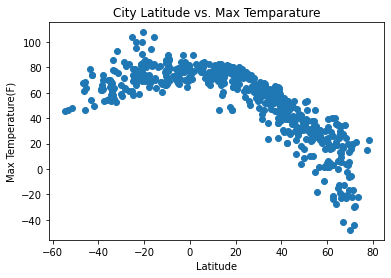

In [10]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.title('City Latitude vs. Max Temparature')
plt.show()

## Latitude vs. Humidity Plot

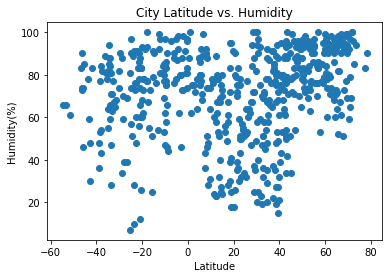

In [11]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

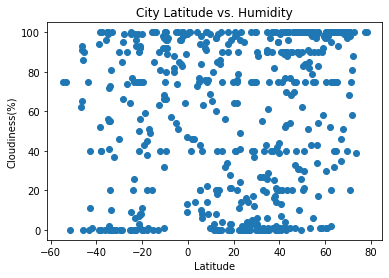

In [12]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('City Latitude vs. Humidity')
plt.show()

## Latitude vs. Wind Speed Plot

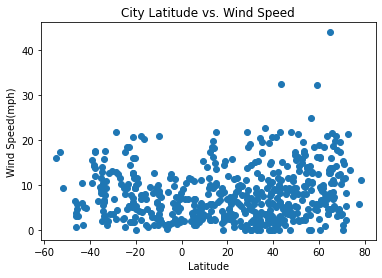

In [13]:
x_values = city_weather_clean_df['Lat']
y_values = city_weather_clean_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.title('City Latitude vs. Wind Speed')
plt.show()

## Linear Regression

In [14]:
city_weather_clean_df['Lat']=pd.to_numeric(city_weather_clean_df['Lat'])

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

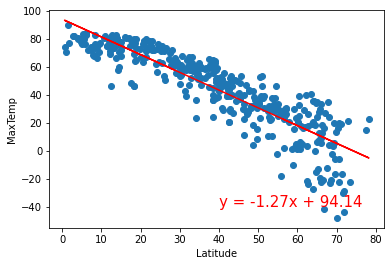

In [15]:
city_weather_NH =  city_weather_clean_df.loc[(city_weather_clean_df['Lat']>=0.000)]
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,-40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

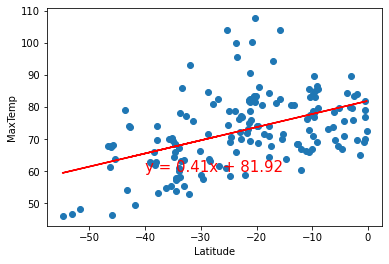

In [16]:
city_weather_SH =  city_weather_clean_df.loc[(city_weather_clean_df['Lat'])<0.00]
#city_weather_SH
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('MaxTemp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

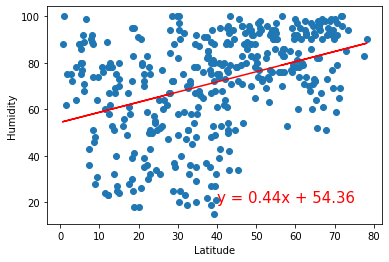

In [17]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

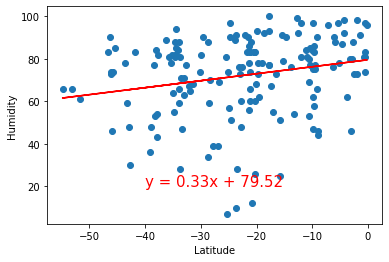

In [18]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

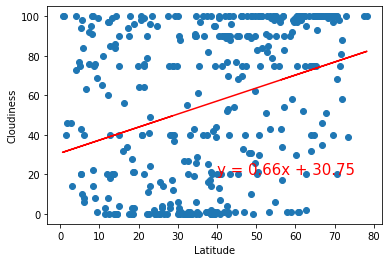

In [19]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

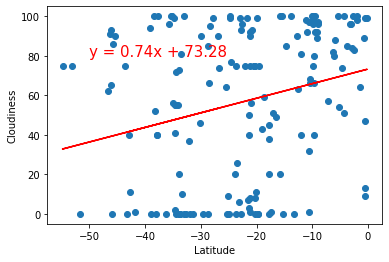

In [20]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

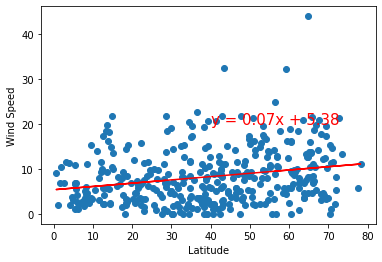

In [21]:
x_values = city_weather_NH['Lat']
y_values = city_weather_NH['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

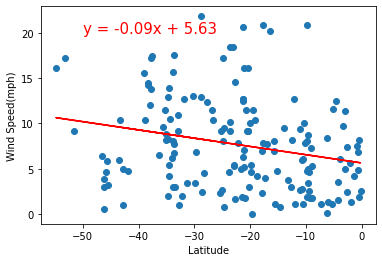

In [22]:
x_values = city_weather_SH['Lat']
#print(x_values)

y_values = city_weather_SH['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()